# Iris Dataset
***

My analysis of the Iris dataset.



To do:  
1. Outputs a summary of each variable to a single text file,  
2. Saves a histogram of each variable to png files, and  
3. Outputs a scatter plot of each pair of variables.  
4. Performs any other analysis you think is appropriate. 

# Past Analysis
***
https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/


https://eminebozkus.medium.com/exploring-the-iris-flower-dataset-4e000bcc266c

# Libraries 
***

In [11]:
# Import pandas to work with dataframes
import pandas as pd

# Import matplotlib.pyplot for Histograms
import matplotlib.pyplot as plt

# Import seaborn for scatter plots with regression line & box plots
import seaborn as sns

# Load the dataset
***

In [2]:
import pandas as pd

iris = pd.read_excel('/Users/davidosullivan/Desktop/pands/pands-project/pands-project/iris_dataset.xlsx')

iris.head()

,sepal length,sepal width,petal length,petal width,class,target
0,5.1,3.5,1.4,0.2,NaN,Iris-setosa
1,4.9,3.0,1.4,0.2,NaN,Iris-setosa
2,4.7,3.2,1.3,0.2,NaN,Iris-setosa
3,4.6,3.1,1.5,0.2,NaN,Iris-setosa
4,5.0,3.6,1.4,0.2,NaN,Iris-setosa


# Clean the data
***


In [4]:
# Convert certain columns to categories for memory efficiency

iris['target'] = iris['target'].astype('category') 
iris['target'].info

<bound method Series.info of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: target, Length: 150, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']>

In [5]:
# Use fillna function to account for null values

iris['sepal length'] = iris['sepal length'].fillna(0) 
iris['sepal width'] = iris['sepal width'].fillna(0)
iris['petal length'] = iris['petal length'].fillna(0) 
iris['petal width'] = iris['petal width'].fillna(0)

In [6]:
# Change 'target' to 'species' and drop class column 
iris.rename(columns={'target':'species'},inplace=True)
iris.drop(columns={'class'}, inplace=True)

In [7]:
# Remove "Iris-" from the 'species' column
iris['species'] = iris['species'].str.replace('Iris-', '')

iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [8]:
# Use .head to ensure changes implemented properly
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
# Identify Number of Duplicates
duplicates = iris[iris.duplicated()]
print("Number of duplicates:", len(duplicates))

Number of duplicates: 3


In [21]:
# Drop Duplicates
iris = iris.drop_duplicates()

# Iris Summary
***

Use 'w' (write mode) to create a text file then file.write to convert the string to a file.
Summary must be converted to a string as it is a text file we are creating.

In [22]:
# Create Summary Statistics
summary = iris.describe()

# Convert summary to a string
summary_str = summary.to_string()

# Write summary statistics to a text file
with open('summary.txt', 'w') as file:
    file.write(summary_str)

# Histograms 
***

# 1) Sepal Length

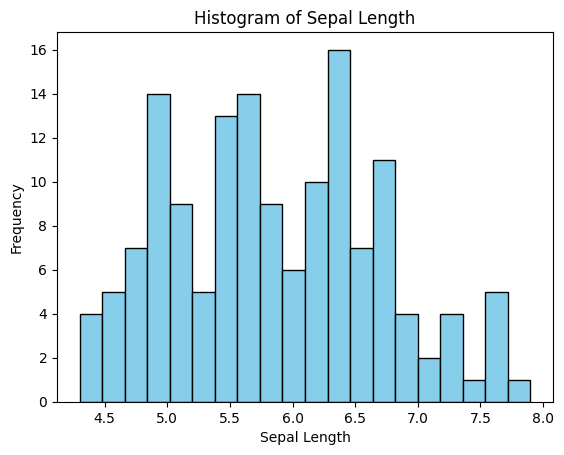

In [23]:
# Use matplotlib.pyplot to create histograms

plt.hist(iris['sepal length'], bins = 20, color = 'skyblue', edgecolor = 'black')

# Add title and labels
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

# Save the plot as a PNG file
plt.savefig('histogram_sepal_length.png')

# Show the plot
plt.show()

# 2) Sepal Width

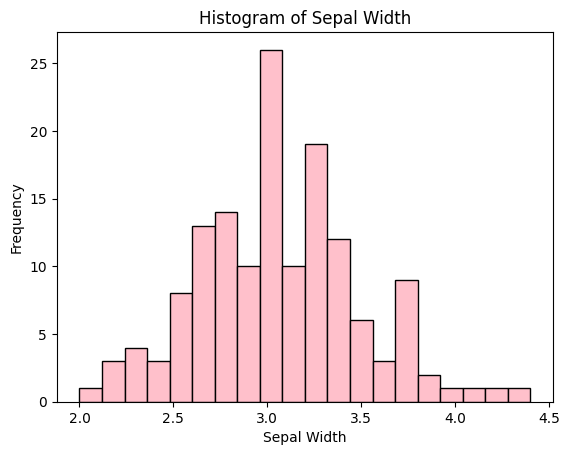

In [24]:
plt.hist(iris['sepal width'], bins = 20, color = 'pink', edgecolor = 'black')

# Add title and labels
plt.title('Histogram of Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')

# Save the plot as a PNG file
plt.savefig('histogram_sepal_width.png')

# Show the plot
plt.show()

# 3) Petal Length

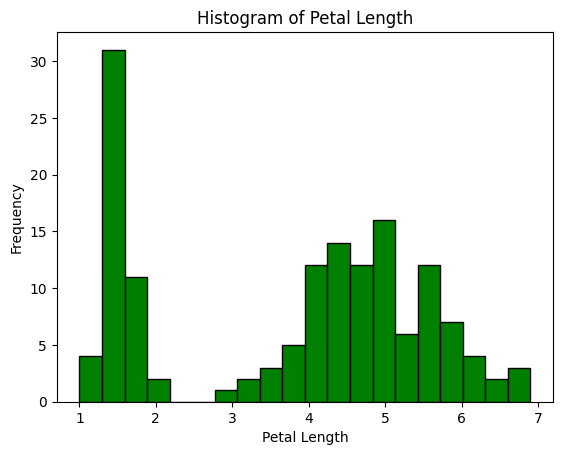

In [25]:
plt.hist(iris['petal length'], bins = 20, color = 'green', edgecolor = 'black')

# Add title and labels
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')

# Save the plot as a PNG file
plt.savefig('histogram_petal_length.png')

# Show the plot
plt.show()

# 4) Petal Width

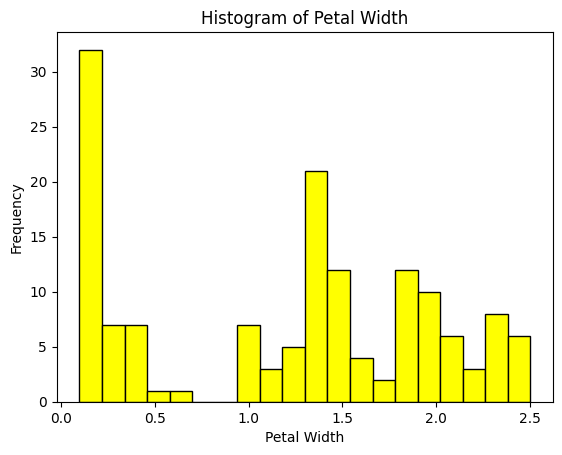

In [26]:
plt.hist(iris['petal width'], bins = 20, color = 'yellow', edgecolor = 'black')

# Add title and labels
plt.title('Histogram of Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')

# Save the plot as a PNG file
plt.savefig('histogram_petal_width.png')

# Show the plot
plt.show()

# Scatter Plots
***

(Originally created all scatter plots individually then discovered pairplots: https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/) For reference I also added some individual scatter plots where there is a strong relationship between the two variables.

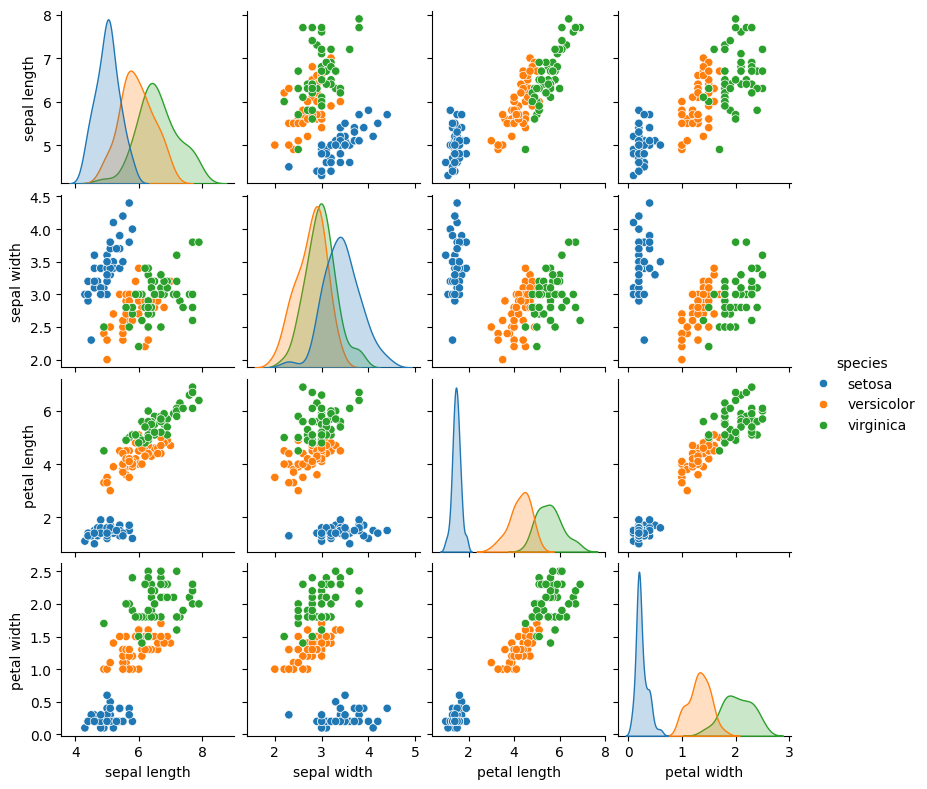

In [27]:
# Create pairplot 
# Use 'hue' to specify categorical variable
sns.pairplot(iris[['sepal length', 'sepal width','petal length', 'petal width', 'species']], hue='species', height=2)
plt.show()

In [28]:
# Compute the correlation matrix (All columns except 'species')
columns_to_correlate = ['sepal length','sepal width', 'petal length', 'petal width']
correlation_matrix = iris[columns_to_correlate].corr().round(1)
correlation_matrix

,sepal length,sepal width,petal length,petal width
sepal length,1.0,-0.1,0.9,0.8
sepal width,-0.1,1.0,-0.4,-0.4
petal length,0.9,-0.4,1.0,1.0
petal width,0.8,-0.4,1.0,1.0


Correlation Coefficient:0.87


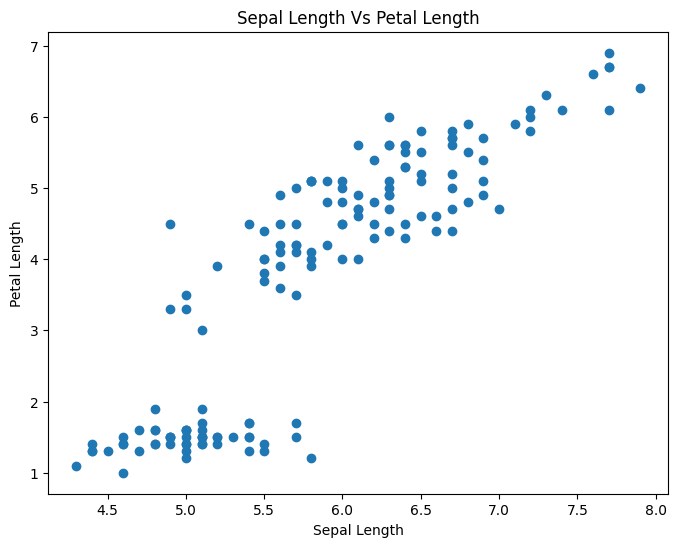

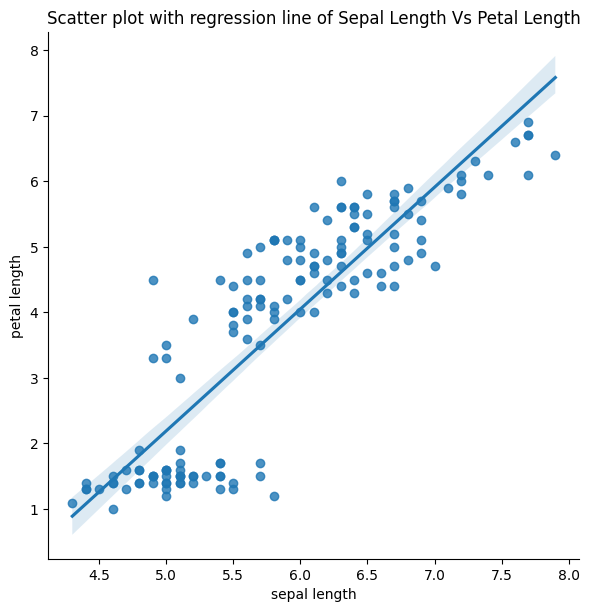

In [9]:
# Correlation between Sepal Length & Petal Length 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Correlation
correlation = iris['sepal length'].corr(iris['petal length']).round(2)
print(f'Correlation Coefficient:{correlation}')

# Visualise Relationship
plt.figure(figsize=(8,6))
plt.scatter(iris['sepal length'], iris['petal length'])
plt.title('Sepal Length Vs Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel("Petal Length")
plt.show()

# Seaborn Scatter Plot w/ Regression Line
sns.lmplot(x = 'sepal length', y='petal length', data = iris, height = 6)
plt.title("Scatter plot with regression line of Sepal Length Vs Petal Length")
plt.show()

Correlation Coefficient:0.82


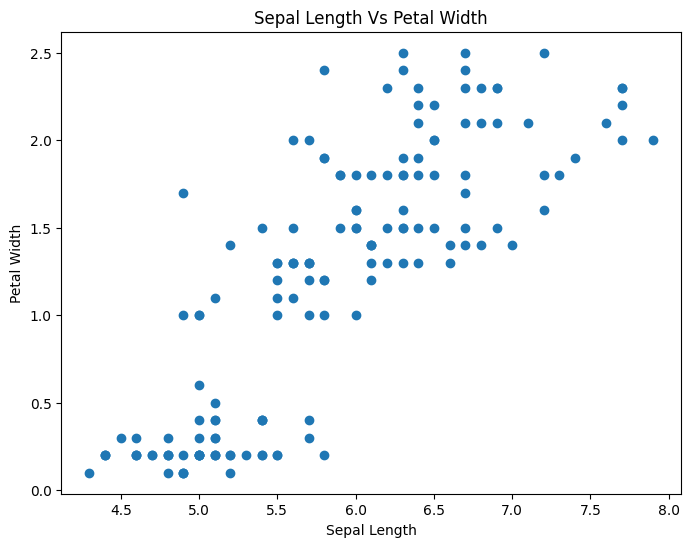

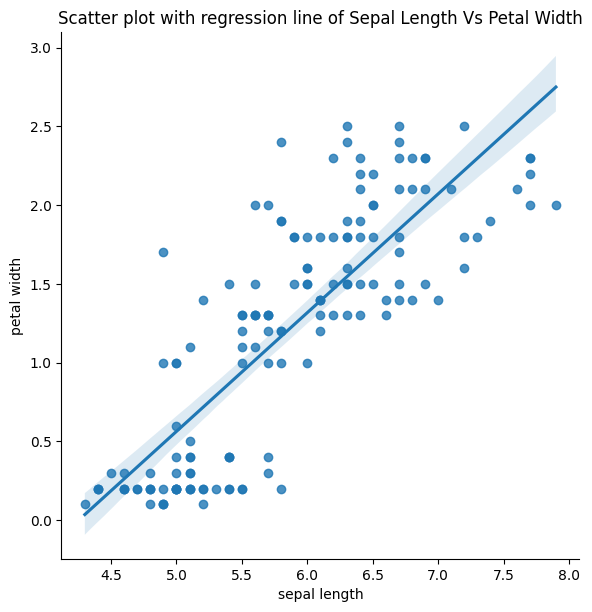

In [10]:
# Correlation between Sepal Length & Petal Width 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation = iris['sepal length'].corr(iris['petal width']).round(2)
print(f'Correlation Coefficient:{correlation}')

# Visualise Relationship
plt.figure(figsize=(8,6))
plt.scatter(iris['sepal length'], iris['petal width'])
plt.title('Sepal Length Vs Petal Width')
plt.xlabel('Sepal Length')
plt.ylabel("Petal Width")
plt.show()

# Seaborn Scatter Plot w/ Regression Line
sns.lmplot(x = 'sepal length', y='petal width', data = iris, height = 6)
plt.title("Scatter plot with regression line of Sepal Length Vs Petal Width")
plt.show()

# Additional Analysis
***
Look at data specific to the three different species

In [29]:
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
# Use GroupBy Function to Group different variables together 

mmm_sepal_length = iris.groupby('species')['sepal length'].agg(['min','max','mean']).round(1)
mmm_sepal_width = iris.groupby('species')['sepal width'].agg(['min','max','mean']).round(1)
mmm_petal_length = iris.groupby('species')['petal length'].agg(['min','max','mean']).round(1)
mmm_petal_width = iris.groupby('species')['petal width'].agg(['min','max','mean']).round(1)

print(f'Sepal Length Breakdown: \n {mmm_sepal_length}')
print(f'Sepal Width Breakdown: \n {mmm_sepal_width}')
print(f'Petal Length Breakdown: \n {mmm_petal_length}')
print(f'Petal Width Breakdown: \n {mmm_petal_width}')

Sepal Length Breakdown: 
             min  max  mean
species                   
setosa      4.3  5.8   5.0
versicolor  4.9  7.0   5.9
virginica   4.9  7.9   6.6
Sepal Width Breakdown: 
             min  max  mean
species                   
setosa      2.3  4.4   3.4
versicolor  2.0  3.4   2.8
virginica   2.2  3.8   3.0
Petal Length Breakdown: 
             min  max  mean
species                   
setosa      1.0  1.9   1.5
versicolor  3.0  5.1   4.3
virginica   4.5  6.9   5.6
Petal Width Breakdown: 
             min  max  mean
species                   
setosa      0.1  0.6   0.2
versicolor  1.0  1.8   1.3
virginica   1.4  2.5   2.0


# Box Plots
***

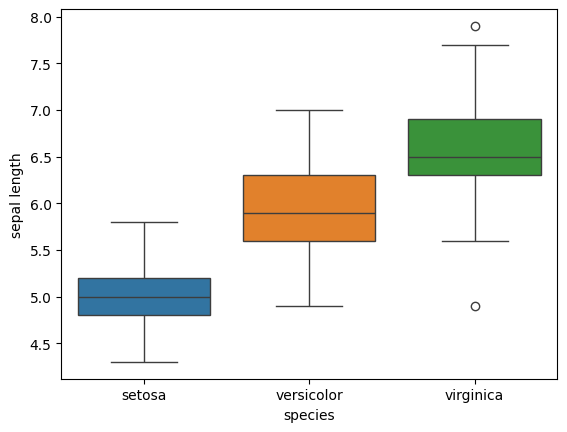

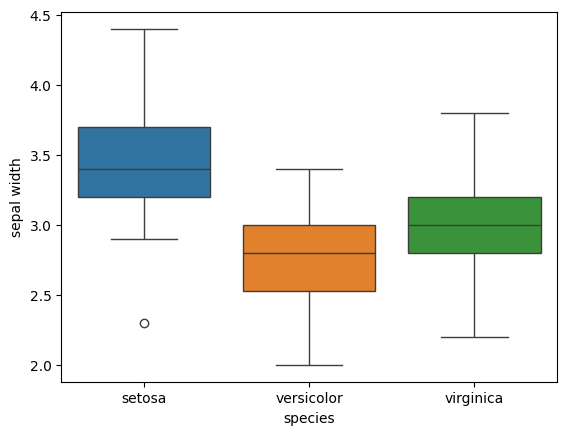

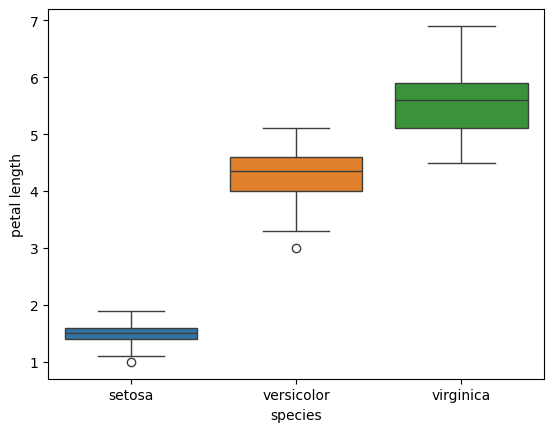

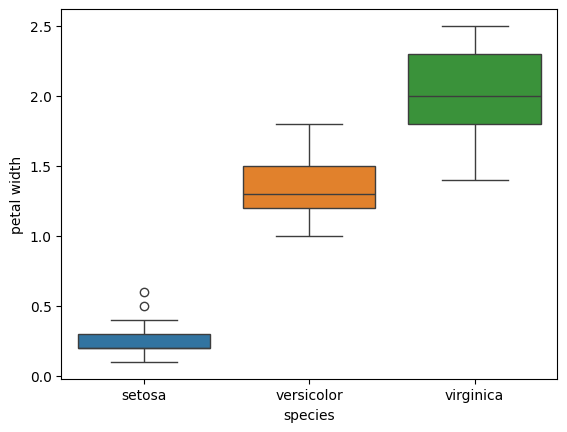

In [33]:
# Plotting the boxplot
sns.boxplot(x='species', y='sepal length', data=iris, hue = 'species')
plt.show()

sns.boxplot(x='species', y='sepal width', data=iris, hue = 'species')
plt.show()

sns.boxplot(x='species', y='petal length', data=iris, hue = 'species')
plt.show()

sns.boxplot(x='species', y='petal width', data=iris, hue = 'species')
plt.show()